In [113]:
import matplotlib.pyplot as plt
import numpy as np
import sigpy
from TrajToImage import TrajToImage

from PyMRStrain.KSpaceTraj import Cartesian, Radial, Spiral
from PyMRStrain.Math import itok, ktoi
from PyMRStrain.Parameters import Parameters
from PyMRStrain.Phantom import Phantom
from PyMRStrain.Spins import Spins



In [184]:
# Phantom parameters
p = Parameters(time_steps=18)
p.h = 0.008
p.phi_en = -15*np.pi/180
p.phi_ep = 0*np.pi/180

# Spins
spins = Spins(Nb_samples=20000, parameters=p)

# Create phantom object
phantom = Phantom(spins, p, patient=False, z_motion=False, write_vtk=False)

# Imaging parameters
FOV = np.array([0.25, 0.25], dtype=np.float64)
res = np.array([64, 64], dtype=np.int64)

# Phantom
r = spins.samples
Mxy = 2.0*np.exp(1j*50*r[:,0])

# Cartesian kspace
c_traj = Cartesian(FOV=FOV, res=res, oversampling=2, lines_per_shot=9)
K = TrajToImage(c_traj.points, c_traj.times, Mxy, r)
K[:,1::2] = K[::-1,1::2]


Number of spins in process 0: 20000
0.0004672902675704494
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00046714941009687755
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00046704148820623137
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00046698028967870526
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.0004669769351816306
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553
0.00014995206382107553


0.00046697093559237255
0.00026172511722172715
0.00026172511722172715
0.00046697093559237255
0.00026172511722172715
0.00026172511722172715
0.00046697093559237255
0.00026172511722172715
0.00026172511722172715
0.00046697093559237255
0.00026172511722172715
0.00026172511722172715
0.00046697093559237255
0.00026172511722172715
0.00026172511722172715
0.00046697093559237255
0.00026172511722172715
0.00026172511722172715
0.00046697093559237255
0.00026172511722172715
0.00026172511722172715
0.00046697093559237255
0.00026172511722172715
0.00026172511722172715
0.00046697093559237255
0.00026172511722172715
0.00026172511722172715
0.00046697093559237255
0.00026172511722172715
0.00026172511722172715
0.00046697093559237255
0.00026172511722172715
0.00026172511722172715


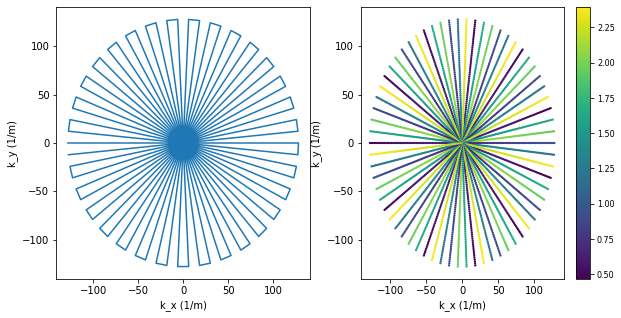

4224


In [188]:

# Non-cartesian kspace
# r_traj = Cartesian(FOV=FOV, res=res, oversampling=2, lines_per_shot=9)
r_traj = Radial(FOV=FOV, res=res, oversampling=2, lines_per_shot=3, spokes=33)
# r_traj = Spiral(FOV=FOV, res=res, oversampling=8, lines_per_shot=2, interleaves=10)
r_traj.plot_trajectory()
Kr = TrajToImage(r_traj.points, r_traj.times, Mxy, r)
print(Kr.size)


In [189]:
# Non-uniform fft
x0 = r_traj.points[0].flatten().reshape((-1,1))
x1 = r_traj.points[1].flatten().reshape((-1,1))
x0 *= Nd[0]//2/x0.max()
x1 *= Nd[1]//2/x1.max()
om = np.concatenate((x0,x1),axis=1)
y = Kr.flatten().reshape((-1,1))
om = np.concatenate((x0,x1),axis=1)
Nd = (res[0],res[1])
Kd = (Kr.shape[0],Kr.shape[1])
dcf = (x0**2 + x1**2)**0.5
image = sigpy.fourier.nufft_adjoint(y*dcf,om,Nd)


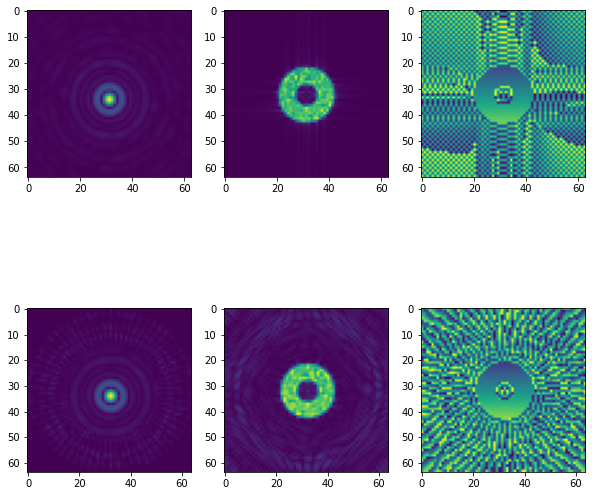

In [190]:
fig, axs = plt.subplots(2, 3, figsize=(10, 10))
# axs[0].scatter(r_traj.points[0],r_traj.points[1],c=abs(K),s=10)
axs[0,0].imshow(np.abs(K[::2,:]))
axs[0,1].imshow(np.abs(ktoi(K[::2,:])))
axs[0,2].imshow(np.angle(ktoi(K[::2,:])))
axs[1,0].imshow(np.abs(itok(image)))
axs[1,1].imshow(np.abs(image))
axs[1,2].imshow(np.angle(image))
plt.show()
